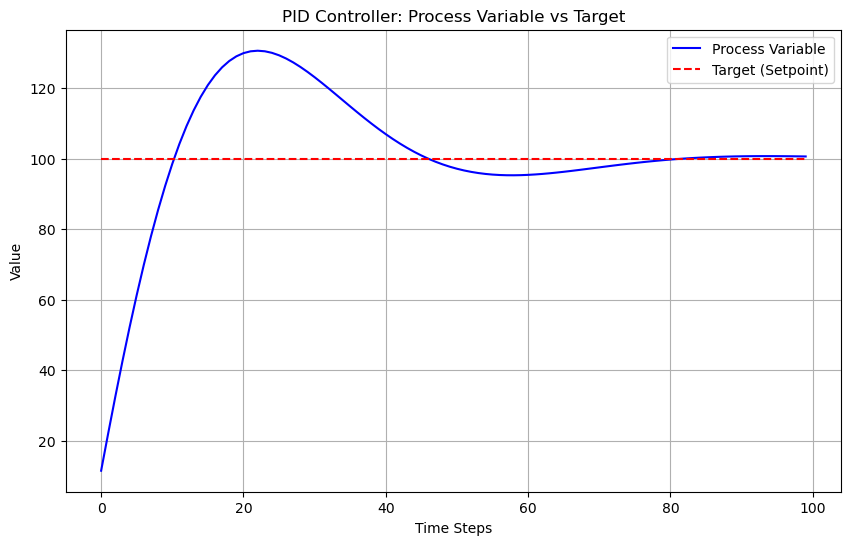

In [1]:
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, Kp, Ki, Kd, setpoint=0.0):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.setpoint = setpoint
        self.previous_error = 0.0
        self.integral = 0.0

    def compute(self, current_value):
        # Calculate the error
        error = self.setpoint - current_value
        
        # Proportional term
        proportional = self.Kp * error
        
        # Integral term (accumulated error)
        self.integral += error
        integral = self.Ki * self.integral
        
        # Derivative term (rate of change of error)
        derivative = self.Kd * (error - self.previous_error)
        
        # Store current error for next iteration
        self.previous_error = error
        
        # Total PID output
        output = proportional + integral + derivative
        return output

pid = PIDController(Kp=1.0, Ki=0.1, Kd=0.05, setpoint=100.0)

current_value = 0.0
target = pid.setpoint
time_steps = 100
process_values = []
control_signals = []
time = list(range(time_steps))

for i in time:
    control_signal = pid.compute(current_value)
    
    current_value += control_signal * 0.1
    
    # Store results for plotting
    process_values.append(current_value)
    control_signals.append(control_signal)

plt.figure(figsize=(10, 6))
plt.plot(time, process_values, label='Process Variable', color='blue')
plt.plot(time, [target] * time_steps, label='Target (Setpoint)', color='red', linestyle='--')
plt.title('PID Controller: Process Variable vs Target')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()